In [180]:
import numpy as np
import itertools
import scipy.sparse as sparse
import os
import pickle

import matplotlib.pyplot as plt
import importlib
import mtgcardclassification
importlib.reload(mtgcardclassification)
from mtgcardclassification import *


In [124]:
#change this to a local folder on your PC in which "scryfall-all-cards.txt" is stored
direc = 'C:/Users/basvanopheusden/Documents/MTG/'

if os.path.exists(direc + 'scryfall-all-cards-pickled.txt'):
    print('using pre-generated all_cards')
    all_cards = pickle_load(direc,'scryfall-all-cards-pickled.txt')
else: 
    all_cards = load_all_cards(direc)

using pre-generated all_cards


In [181]:
if False and os.path.exists(direc + 'scryfall-filtered-cards-pickled.txt'):
    print('using pre-generated filtered_cards')
    filtered_cards = pickle_load(direc,'scryfall-filtered-cards-pickled.txt')
else: 
    filtered_cards = get_filtered_cards(direc,all_cards)

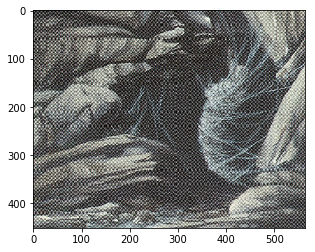

In [183]:
card = np.random.choice(all_cards)
art = get_cropped_art(card)
plt.imshow(art)
plt.show()

In [184]:
unique_card_names,index,num_reprints = np.unique([c['name'] for c in filtered_cards[::-1]],
                                                 return_counts = True,return_index=True)
unique_filtered_cards = [filtered_cards[::-1][i] for i in index]
#reversing the filtered_cards list is necessary to select the first printed edition of each card
print('Number of unique filtered cards:',len(unique_filtered_cards))

Number of unique filtered cards: 17457


In [167]:
most_reprinted_cards = np.array(list(zip(unique_card_names,num_reprints)))[np.argsort(num_reprints)[::-1]][:50]

In [168]:
illegal_cards = list(filter(lambda c: not c['legalities']['vintage'] in ['legal','restricted'], filtered_cards))
print([c['name'] for c in illegal_cards])

['Falling Star', 'Shahrazad', 'Chaos Orb', 'Chaos Orb', 'Chaos Orb']


In [185]:
sets,counts = np.unique([c['set_name'] for c in unique_filtered_cards],return_counts=True)
list(zip(sets[np.argsort(counts)],np.sort(counts)))

[('Eternal Masters', 1),
 ('Eighth Edition', 1),
 ('Time Spiral Timeshifted', 1),
 ('Limited Edition Beta', 2),
 ('Planechase', 4),
 ('Planechase 2012', 17),
 ('Starter 1999', 26),
 ('Commander 2013', 43),
 ('Commander 2011', 46),
 ('Commander 2017', 50),
 ('Conspiracy', 51),
 ('Commander 2018', 53),
 ('Commander 2016', 54),
 ('Commander 2014', 55),
 ('Commander 2015', 55),
 ('Conspiracy: Take the Crown', 65),
 ('Arabian Nights', 73),
 ('Antiquities', 80),
 ('Battlebond', 82),
 ('Magic 2012', 89),
 ('Fallen Empires', 98),
 ('Magic 2013', 99),
 ('Magic 2010', 102),
 ('Magic 2011', 104),
 ('Homelands', 105),
 ('Magic 2014', 106),
 ('Portal Second Age', 112),
 ('The Dark', 112),
 ("Urza's Destiny", 123),
 ("Dragon's Maze", 123),
 ('Exodus', 124),
 ('Stronghold', 126),
 ('Scourge', 127),
 ('Apocalypse', 129),
 ('Dark Ascension', 129),
 ('Magic 2015', 130),
 ('Born of the Gods', 130),
 ('Prophecy', 131),
 ('Worldwake', 132),
 ('Judgment', 133),
 ("Urza's Legacy", 133),
 ('Alliances', 133),


In [131]:
#leagcy, do not use
#def get_color_asymmetry(f):
#    if np.sum(f[1:])>0:
#        return sts.power_divergence(f[1:],(color_counts[1:]/np.sum(color_counts[1:])*np.sum(f[1:])),lambda_ = "log-likelihood")
#    else:
#        return 0,1

In [ ]:
mono_colors = [['W'],['U'],['B'],['R'],['G']]
keys = ['name','power','toughness','type','subtype','manacost','oracletext']
m,matching_cards,inds = classify_card_colors_kfold(unique_filtered_cards,keys,10,mono_colors)

[['W'], ['U'], ['B'], ['R'], ['G']]
loading cards
building design matrix
building design matrix for name
building design matrix for power
building design matrix for toughness
building design matrix for type
building design matrix for subtype
building design matrix for manacost
building design matrix for oracletext
starting fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 105 seconds


C:\Users\basvanopheusden\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.8min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 107 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.8min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 114 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.9min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


In [72]:
with open(direc + 'classification_model_5c_color_identity_pickled.txt','wb') as f:
    pickle.dump((m,matching_cards),f)

In [73]:
most_predictive_features = get_most_predictive_features(m)
#Note: this does not work for binary classification, only 2+ colors
[(x,y,c) for ((x,y),d,c) in most_predictive_features]

[('subtype', 'Zombie', 'B'),
 ('subtype', 'Merfolk', 'U'),
 ('subtype', 'Elf', 'G'),
 ('subtype', 'Goblin', 'R'),
 ('oracletext', 'haste', 'R'),
 ('subtype', 'Angel', 'W'),
 ('subtype', 'Illusion', 'U'),
 ('subtype', 'Demon', 'B'),
 ('subtype', 'Druid', 'G'),
 ('subtype', 'Cleric', 'W'),
 ('oracletext', 'fear', 'B'),
 ('subtype', 'Vampire', 'B'),
 ('oracletext', 'reach', 'G'),
 ('oracletext', 'deathtouch', 'B'),
 ('subtype', 'Soldier', 'W'),
 ('oracletext', 'vigilance', 'W'),
 ('subtype', 'Skeleton', 'B'),
 ('subtype', 'Kor', 'W'),
 ('subtype', 'Rat', 'B'),
 ('subtype', 'Wizard', 'U'),
 ('subtype', 'Plant', 'G'),
 ('subtype', 'Horror', 'B'),
 ('oracletext', 'forestwalk', 'G'),
 ('oracletext', 'green', 'G'),
 ('oracletext', 'with_flying', 'G'),
 ('subtype', 'Knight', 'W'),
 ('subtype', 'Minotaur', 'R'),
 ('name', 'goblin', 'R'),
 ('subtype', 'Vedalken', 'U'),
 ('oracletext', 'discards', 'B'),
 ('oracletext', 'flying', 'U'),
 ('oracletext', 'black', 'B'),
 ('oracletext', 'trample', 'G'),

In [74]:
accuracy = np.mean(m.is_correct)
print(accuracy)

0.8036519214607686


In [75]:
def plot_predicted_dist(m,i,alpha=1):
    plt.bar(np.arange(0,len(m.unique_colors)),m.predicted_color_dists[i,:],alpha=alpha)
    plt.xticks(np.arange(0,len(m.unique_colors)),labels=m.unique_colors, rotation=90)
    plt.show()

def show_classification_info(m,cards,i,show_plot=True):
    card = cards[i]
    predicted_colors = m.unique_colors[np.argmax(m.predicted_color_dists[i,:])]
    
    features,importance,intercept = m.get_features_by_importance(i,predicted_colors)
    
    print('----------------')
    print("Card:",card['name'])
    print("Colors:",card["colors"])
    print("Mana cost:",card['mana_cost'])
    print("type:",card["type_line"])
    print("Predicted colors",[predicted_colors])
    print("Confidence:",m.confidence[i])
    print("Oracle text:",card['oracle_text'])
    print("Intercept:",intercept)
    print("Strongest features:",[(features[k],importance[k]) for k in np.argsort(importance)[::-1] if importance[k]>0][:10])
    if show_plot:
        plot_predicted_dist(m,i)

----------------
Card: Rejuvenate
Colors: ['G']
Mana cost: {3}{G}
type: Sorcery
Predicted colors ['G']
Confidence: 0.4481532377782308
Oracle text: You gain 6 life.
Cycling {2} ({2}, Discard this card: Draw a card.)
Intercept: 0.007666146062714365
Strongest features: [(('oracletext', 'you_gain'), 0.6157035088730447), (('oracletext', '6'), 0.47776730567658776), (('oracletext', 'gain'), 0.43083252934822114), (('oracletext', '6_life'), 0.22567781786459468), (('oracletext', 'gain_6_life'), 0.16629978483977734), (('oracletext', 'gain_6'), 0.16629978483977734), (('manacost', '{@}'), 0.041039161772832324), (('type', 'Sorcery'), 2.898639896474987e-06)]


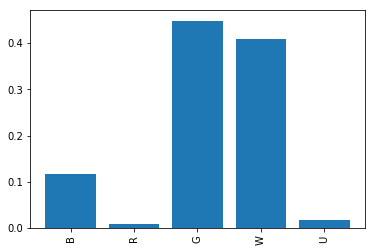

----------------
Card: Magma Jet
Colors: ['R']
Mana cost: {1}{R}
type: Instant
Predicted colors ['R']
Confidence: 0.8923132022161361
Oracle text: Magma Jet deals 2 damage to any target. Scry 2.
Intercept: 0.005275375723358751
Strongest features: [(('oracletext', 'deals'), 0.9043310843009882), (('oracletext', 'damage'), 0.6350449355676719), (('oracletext', 'damage_to'), 0.43751485807093354), (('oracletext', 'to_any'), 0.41277076992103273), (('oracletext', 'any_target'), 0.38880598586817666), (('oracletext', 'damage_to_any'), 0.32894714810643216), (('oracletext', 'to_any_target'), 0.2186094163232872), (('oracletext', 'any'), 0.19984261707101936), (('oracletext', 'target'), 0.12580387007973348), (('oracletext', 'deals_2_damage'), 0.11334891392865995)]


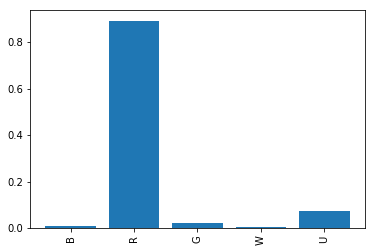

----------------
Card: Sanctum Prelate
Colors: ['W']
Mana cost: {1}{W}{W}
type: Creature — Human Cleric
Predicted colors ['W']
Confidence: 0.9000370117114069
Oracle text: As Sanctum Prelate enters the battlefield, choose a number.
Noncreature spells with converted mana cost equal to the chosen number can't be cast.
Intercept: 0.02694927569342578
Strongest features: [(('subtype', 'Cleric'), 1.966535738238736), (('power', '2'), 0.7957791832933565), (('subtype', 'Human'), 0.7164644588838815), (('oracletext', 'to_the'), 0.22782788414435867), (('oracletext', 'the_battlefield'), 0.21959663495730256), (('oracletext', 'as'), 0.2146549383101642), (('oracletext', 'the_chosen'), 0.19095631601041738), (('name', 'sanctum'), 0.1382634992350597), (('manacost', '{1}'), 0.13820354326864437), (('oracletext', 'spells'), 0.10333374245949263)]


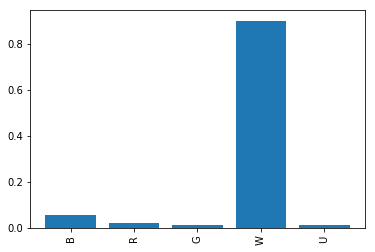

----------------
Card: D'Avenant Archer
Colors: ['W']
Mana cost: {2}{W}
type: Creature — Human Soldier Archer
Predicted colors ['W']
Confidence: 0.9761673519948332
Oracle text: {T}: D'Avenant Archer deals 1 damage to target attacking or blocking creature.
Intercept: 0.015143651607134587
Strongest features: [(('subtype', 'Soldier'), 1.8232608111124016), (('oracletext', 'target_attacking'), 0.7855874888324816), (('subtype', 'Human'), 0.7848056610575013), (('power', '1'), 0.563405960167842), (('oracletext', 'attacking'), 0.33130684856876247), (('oracletext', '1'), 0.2986894036592322), (('oracletext', 'attacking_or'), 0.29842159797542417), (('oracletext', 'attacking_or_blocking'), 0.29842159797542417), (('oracletext', 'or_blocking'), 0.29842159797542417), (('oracletext', '{t}'), 0.2462849567843576)]


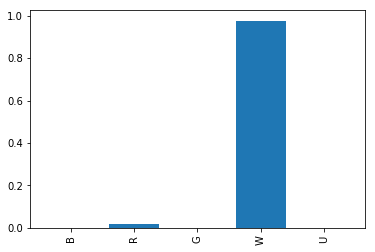

----------------
Card: Word of Command
Colors: ['B']
Mana cost: {B}{B}
type: Instant
Predicted colors ['U']
Confidence: 0.5490262404519276
Oracle text: Look at target opponent's hand and choose a card from it. You control that player until Word of Command finishes resolving. The player plays that card if able. While doing so, the player can activate mana abilities only if they're from lands that player controls and only if mana they produce is spent to activate other mana abilities of lands the player controls and/or to play that card. If the chosen card is cast as a spell, you control the player while that spell is resolving.
Intercept: 0.011137748386606337
Strongest features: [(('oracletext', 'as_a'), 0.4202141505684953), (('oracletext', 'spell'), 0.4099164155514825), (('type', 'Instant'), 0.35418690647752715), (('oracletext', 'to'), 0.3023797704720929), (('oracletext', 'is'), 0.28831161683764756), (('oracletext', 'look_at'), 0.2623668551377096), (('oracletext', 'look'), 0.2623668551

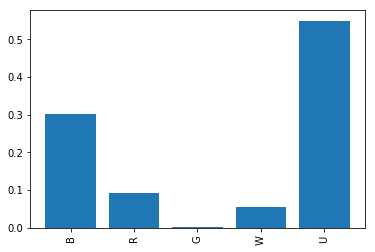

----------------
Card: Heliod, God of the Sun
Colors: ['W']
Mana cost: {3}{W}
type: Legendary Enchantment Creature — God
Predicted colors ['W']
Confidence: 0.9903896842055241
Oracle text: Indestructible
As long as your devotion to white is less than five, Heliod isn't a creature. (Each {W} in the mana costs of permanents you control counts toward your devotion to white.)
Other creatures you control have vigilance.
{2}{W}{W}: Create a 2/1 white Cleric enchantment creature token.
Intercept: 0.02694927569342578
Strongest features: [(('oracletext', 'vigilance'), 1.789891862039667), (('oracletext', 'enchantment'), 1.152988646777823), (('oracletext', 'white'), 0.9737781539902197), (('oracletext', 'indestructible'), 0.6533343823002904), (('toughness', '6'), 0.46204519078189726), (('oracletext', 'creatures'), 0.3832626550191328), (('type', 'Enchantment'), 0.3042855419920061), (('name', 'the'), 0.3018804612956742), (('oracletext', 'you'), 0.27251003296585086), (('oracletext', 'as'), 0.214654938

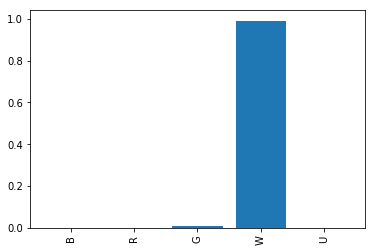

----------------
Card: Suffer the Past
Colors: ['B']
Mana cost: {X}{B}
type: Instant
Predicted colors ['B']
Confidence: 0.9943523616009616
Oracle text: Exile X target cards from target player's graveyard. For each card exiled this way, that player loses 1 life and you gain 1 life.
Intercept: -0.04688720904700804
Strongest features: [(('oracletext', 'life'), 1.126780840921235), (('oracletext', 'and_you'), 0.8949165385730462), (('oracletext', 'graveyard'), 0.8633993711664015), (('oracletext', 'loses'), 0.8408279825412804), (('oracletext', 'and_you_gain'), 0.71411621842159), (('oracletext', 'player_loses'), 0.5547507049765206), (('oracletext', 'exile'), 0.38737591373060487), (('oracletext', 'from_target'), 0.3076662865370472), (('oracletext', 'x'), 0.2959384253457044), (('oracletext', '1_life'), 0.2866481852041823)]


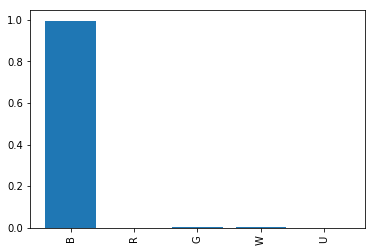

----------------
Card: Tower Above
Colors: ['G']
Mana cost: {2/G}{2/G}{2/G}
type: Sorcery
Predicted colors ['G']
Confidence: 0.9522156188061025
Oracle text: ({2/G} can be paid with any two mana or with {G}. This card's converted mana cost is 6.)
Until end of turn, target creature gets +4/+4 and gains trample, wither, and "When this creature attacks, target creature blocks it this turn if able." (It deals damage to creatures in the form of -1/-1 counters.)
Intercept: -0.0011503346075561534
Strongest features: [(('oracletext', 'trample'), 1.4410438879466472), (('oracletext', '+4/+4'), 0.5192298154473396), (('oracletext', 'gains'), 0.36112486739712457), (('oracletext', 'gets_+4/+4'), 0.3252245547465645), (('oracletext', 'gains_trample'), 0.2465914116121939), (('oracletext', 'creature_gets'), 0.23057180250246267), (('oracletext', 'target_creature_gets_+4/+4'), 0.19808234978478592), (('oracletext', 'this_turn'), 0.155973379919282), (('oracletext', 'this_creature'), 0.14835698285549306), (('

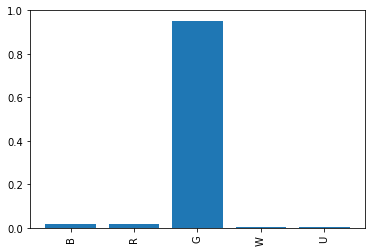

----------------
Card: Voiceless Spirit
Colors: ['W']
Mana cost: {2}{W}
type: Creature — Spirit
Predicted colors ['W']
Confidence: 0.7535356713477019
Oracle text: Flying, first strike
Intercept: 0.01946331350138288
Strongest features: [(('oracletext', 'flying'), 0.8321102239086351), (('oracletext', 'strike'), 0.8123528950692454), (('power', '2'), 0.7739793805402767), (('subtype', 'Spirit'), 0.41014417470074277), (('oracletext', 'first_strike'), 0.179283613068982), (('name', 'spirit'), 0.16314131911340823), (('oracletext', 'first'), 0.05356327000823652)]


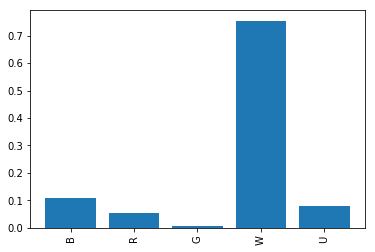

----------------
Card: Yawning Fissure
Colors: ['R']
Mana cost: {4}{R}
type: Sorcery
Predicted colors ['B']
Confidence: 0.6046350090423889
Oracle text: Each opponent sacrifices a land.
Intercept: -0.04759307887385234
Strongest features: [(('oracletext', 'sacrifices'), 0.6069499890649068), (('oracletext', 'each_opponent'), 0.5475970140117322), (('oracletext', 'opponent'), 0.4922646842873283), (('manacost', '{4}'), 0.2942073323402928), (('oracletext', 'sacrifices_a'), 0.2794765850974243), (('manacost', '{@}'), 0.10088014951043267), (('oracletext', 'a'), 0.08086872480419617)]


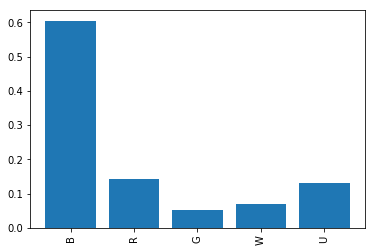

In [76]:
for _ in range(10):
    show_classification_info(m,matching_cards,np.random.randint(len(inds)))

In [78]:
for color in m.unique_colors:
    if len(color)==1:
        #priority = m.confidence*(m.unique_colors[m.predicted_color]==color)
        priority = (m.is_correct==0)*m.confidence*(m.unique_colors[m.predicted_color]==color)
        #and len(get_words_in_oracle_text(card))<10 for card in cards])
        ind = np.argsort(priority)[::-1]
        for i in ind[:10]:
            if priority[i]>0:
                show_classification_info(m,matching_cards,i,False)

----------------
Card: Viscerid Drone
Colors: ['U']
Mana cost: {1}{U}
type: Creature — Homarid Drone
Predicted colors ['B']
Confidence: 0.9999954256425481
Oracle text: {T}, Sacrifice a creature and a Swamp: Destroy target nonartifact creature. It can't be regenerated.
{T}, Sacrifice a creature and a snow Swamp: Destroy target creature. It can't be regenerated.
Intercept: -0.0465380477391585
Strongest features: [(('oracletext', 'destroy'), 1.0674535772139062), (('oracletext', 'sacrifice_a_creature'), 0.9162056054245872), (('oracletext', 'destroy_target_creature'), 0.8858390970416923), (('oracletext', 'swamp'), 0.8645497322442455), (('toughness', '2'), 0.39178778624847627), (('oracletext', 'sacrifice_a'), 0.37552575837746044), (('oracletext', 'a_swamp'), 0.3645351721852607), (('oracletext', 'creature'), 0.3465602257695806), (('oracletext', 'nonartifact'), 0.34490964852195694), (('oracletext', 'destroy_target'), 0.2614490100268382)]
----------------
Card: Game of Chaos
Colors: ['R']
Mana 

----------------
Card: Sea Troll
Colors: ['U']
Mana cost: {2}{U}
type: Creature — Troll
Predicted colors ['G']
Confidence: 0.9595860219618823
Oracle text: {U}: Regenerate Sea Troll. Activate this ability only if Sea Troll blocked or was blocked by a blue creature this turn.
Intercept: 0.009004106675934664
Strongest features: [(('oracletext', 'regenerate'), 1.0081040916897879), (('type', 'Creature'), 0.9045822739470981), (('subtype', 'Troll'), 0.43575066131056595), (('oracletext', 'blocked_by'), 0.3347045041040686), (('oracletext', 'troll'), 0.3288644162279319), (('oracletext', 'blocked'), 0.3016570774392812), (('name', 'troll'), 0.197512498402859), (('oracletext', 'this_turn'), 0.19511238616479348), (('oracletext', 'ability'), 0.15246542391584952), (('manacost', '{@}'), 0.08413897106430303)]
----------------
Card: Savage Firecat
Colors: ['R']
Mana cost: {3}{R}{R}
type: Creature — Elemental Cat
Predicted colors ['G']
Confidence: 0.9594354766891309
Oracle text: Trample
Savage Firecat ent

----------------
Card: Returned Centaur
Colors: ['B']
Mana cost: {3}{B}
type: Creature — Zombie Centaur
Predicted colors ['U']
Confidence: 0.9685988711610138
Oracle text: When Returned Centaur enters the battlefield, target player puts the top four cards of their library into their graveyard.
Intercept: 0.011378858659309024
Strongest features: [(('subtype', 'Zombie'), 0.4410204559081929), (('oracletext', 'into'), 0.41010758959353777), (('oracletext', 'target_player'), 0.34786049167394517), (('oracletext', 'four_cards'), 0.323099427879983), (('oracletext', 'library_into'), 0.29274665500534724), (('oracletext', 'the_top'), 0.28589414932485174), (('manacost', '{3}'), 0.24566926132796907), (('oracletext', 'target_player_puts'), 0.23448881295709867), (('oracletext', 'into_their_graveyard'), 0.23260302659076815), (('oracletext', 'target_player_puts_the_top'), 0.2172234360036414)]


In [79]:
num_colors = np.array([len(set(c1)) for c1 in m.card_colors])
colors_added = np.array([len(set(c1).difference(set(c2))) 
                         for c1,c2 in zip(m.unique_colors[m.predicted_color],m.card_colors)])
colors_omitted = np.array([len(set(c2).difference(set(c1))) 
                           for c1,c2 in zip(m.unique_colors[m.predicted_color],m.card_colors)])

In [80]:
sparse.csr_matrix((np.ones_like(colors_added),(num_colors,colors_added+colors_omitted))).toarray()

array([[    0,     0,     0],
       [10519,     0,  2570]], dtype=int32)

----------------
Card: Grizzly Bears
Colors: ['G']
Mana cost: {1}{G}
type: Creature — Bear
Predicted colors ['G']
Confidence: 0.6981198906492255
Oracle text: 
Intercept: 0.009007164635970469
Strongest features: [(('subtype', 'Bear'), 1.0088045645383812), (('type', 'Creature'), 0.9416826203021268), (('name', 'bears'), 0.1480158383772448), (('manacost', '{1}'), 0.03171658471223874), (('manacost', '{@}'), 0.00498885404053764), (('toughness', '2'), 1.4582969160510125e-07)]


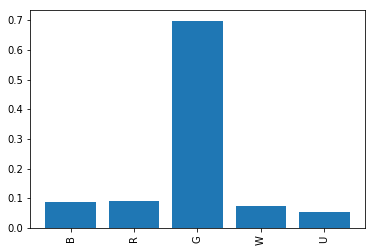

In [81]:
show_classification_info(m,matching_cards,get_card_index_by_name(matching_cards,'grizzly bears'))

In [82]:
def plot_accuracy_by_key(f,keys=None,is_numeric=True,sort_by_count=True,xlabel='',return_values=False):
    x = np.array([f(c) for c in matching_cards])
    if keys==None:
        keys,counts = np.unique(x,return_counts=True)
        if sort_by_count:
            keys = keys[np.argsort(counts)][::-1]
    x_by_key = {key: m.is_correct[np.logical_and(x==key,m.confidence>0)] for key in keys}
    y = [np.mean(x) for key,x in x_by_key.items()]
    yerr = [np.std(x)/np.sqrt(len(x)) for key,x in x_by_key.items()]
    plt.errorbar(x=keys,y=y,yerr=yerr)
    plt.xlabel(xlabel)
    plt.ylabel('Accuracy')
    if not is_numeric:
        plt.xticks(np.arange(0,len(keys)),label=keys,rotation=90)
    plt.show()
    if return_values:
        return keys,y,yerr,x_by_key

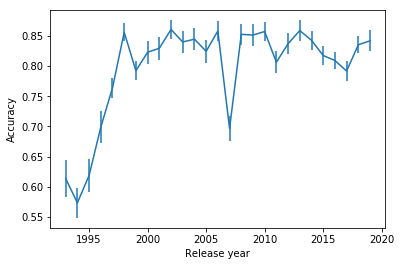

In [83]:
#plot_accuracy_by_key(lambda c:c['rarity'],keys=['common','uncommon','rare','mythic'],is_numeric=False)
#plot_accuracy_by_key(lambda c:len(get_words_in_oracle_text(c)),sort_by_count=False,xlabel='Number of words in oracle text')
#plot_accuracy_by_key(lambda c:c['type_line'].split(' — ')[0],is_numeric=False)
plot_accuracy_by_key(lambda c:int(c['released_at'].split('-')[0]),sort_by_count=False,xlabel='Release year')

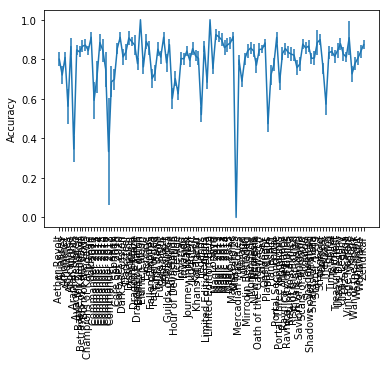

[('Masters 25', 1, 0.0),
 ('Commander 2017', 3, 0.3333333333333333),
 ('Arabian Nights', 52, 0.34615384615384615),
 ('Planar Chaos', 137, 0.4744525547445255),
 ('Legends', 196, 0.5204081632653061),
 ('Antiquities', 32, 0.5625),
 ('The Dark', 82, 0.573170731707317),
 ('Commander 2011', 27, 0.5925925925925926),
 ('Homelands', 88, 0.6022727272727273),
 ('Ice Age', 219, 0.6255707762557078),
 ('Portal Three Kingdoms', 151, 0.6821192052980133),
 ('Limited Edition Alpha', 193, 0.6839378238341969),
 ('Commander 2018', 35, 0.6857142857142857),
 ('Mirage', 219, 0.6894977168949772),
 ('Conflux', 73, 0.6986301369863014),
 ('Hour of Devastation', 141, 0.7021276595744681),
 ('Fallen Empires', 84, 0.7023809523809523),
 ('Commander 2013', 31, 0.7096774193548387),
 ('Planeshift', 75, 0.72),
 ('Alliances', 93, 0.7204301075268817),
 ('Visions', 117, 0.7264957264957265),
 ('Fate Reforged', 122, 0.7295081967213115),
 ('Commander 2016', 24, 0.75),
 ('Tempest', 215, 0.7534883720930232),
 ('Lorwyn', 244, 0.75

In [84]:
keys,y,yerr,x_by_key = plot_accuracy_by_key(lambda c:c['set_name'],is_numeric=False,return_values=True,sort_by_count=False)
# This prints all the sets, plus the number of cards from that set and the model's 
# accuracy on predicting those cards' colors
list(zip(keys[np.argsort(y)],[x_by_key[key].shape[0] for key in keys[np.argsort(y)]],np.sort(y)))

In [89]:
names = [c['name'] for c in matching_cards if c['set_name']=='Treasure Chest']
[len([c for c in all_cards if c['name']==name]) for name in names]

[3,
 8,
 3,
 13,
 2,
 3,
 2,
 8,
 8,
 8,
 8,
 11,
 3,
 3,
 3,
 3,
 8,
 4,
 4,
 8,
 4,
 3,
 3,
 3,
 3,
 4,
 4,
 3,
 3,
 3,
 8,
 8,
 4,
 2,
 4,
 3,
 8,
 13,
 2,
 11,
 3,
 3,
 4,
 8,
 8,
 8,
 8,
 8,
 8,
 3,
 8,
 4,
 2,
 3,
 3,
 3,
 4,
 4,
 8,
 4,
 3,
 8,
 3,
 2,
 3,
 4,
 3,
 2,
 3,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 8,
 3,
 4,
 4,
 9,
 8,
 4,
 4,
 8,
 4,
 2,
 3]

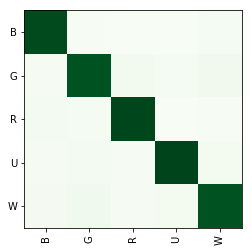

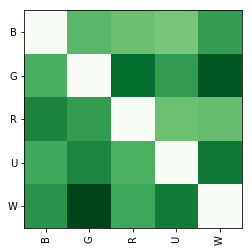

In [85]:
colors, confusion = get_confusion_matrix(m)
plt.imshow(confusion,cmap='Greens')
plt.xticks(np.arange(0,len(colors)),labels=colors,rotation=90)
plt.yticks(np.arange(0,len(colors)),labels=colors)
plt.show()

plt.imshow(np.triu(confusion,1)+np.tril(confusion,-1),cmap='Greens')
plt.xticks(np.arange(0,len(colors)),labels=colors,rotation=90)
plt.yticks(np.arange(0,len(colors)),labels=colors)
plt.show()

In [86]:
(confusion + confusion.T)/2

array([[0.80685241, 0.04149137, 0.04598249, 0.03942825, 0.04957986],
       [0.04149137, 0.78595956, 0.05461622, 0.05153632, 0.06885433],
       [0.04598249, 0.05461622, 0.81426954, 0.03971691, 0.0416374 ],
       [0.03942825, 0.05153632, 0.03971691, 0.82276995, 0.05790815],
       [0.04957986, 0.06885433, 0.0416374 , 0.05790815, 0.78864595]])

In [ ]:
#p = m.predicted_color_dists

#JS = np.sum(p[None,:,:]*np.log(p[:,None,:]+p[None,:,:]),axis=2)+np.sum(p[:,None,:]*np.log(p[:,None,:]+p[None,:,:]),axis=2)
#plt.imshow(JS)
#plt.show()
#X = 1-np.dot(,m.predicted_color_dists.T)

In [ ]:
#u,s,v = np.linalg.svd(p)

In [ ]:
#import sklearn
#X_embedded = sklearn.decomposition.TruncatedSVD(n_components=2).fit_transform(p)
#N=len(cards)
#X_embedded = TSNE(n_components=2).fit_transform(JS[:N,:N])
#c_dict = {'R' : 'red', 'B' : 'black', 'G' : 'green', 'U' : 'blue', 'W' : 'yellow'}
#for c in colors:
#    ind = np.array(m.card_colors)[:N]==c
#    plt.plot(X_embedded[ind,0],X_embedded[ind,1],'.',color=c_dict[c])